This project is about fake news detection system
Here data is collected from 2016 presidential elections when donal trump and hillary clinton stood again each other
In this project we are using feature extraction techniques like CountVectorizer and TF-iDF
Machine learning Models are  Logistic Regression and Multinomila Naive Bayes Classifier and here we are
using confusion matrix rather than accuracy parameter to evalue our project becuase fake News Detection system
is Binary classifier Problem and if we want to measure the performance of our model it woudl be much better if
we use confusion matrix and therefore we have plotted confusion matrix to evaluate our Model.

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sb

import numpy as np # linear algebra
import pandas as pd # data processing

import os
import re
import nltk  # for text pre-processing

In [13]:
train= pd.read_csv("/home/varuna/Downloads/train.csv")
test= pd.read_csv("/home/varuna/Downloads/test.csv")

In [14]:
# shows the shape of the data i.e how many rows and columns dataset is having
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [15]:
# Showing the first new rows of the data
train.head() 
# Data is from different political campaign when hillary clinton and donald trump were against each other in
# presidential campaign

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
train['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [17]:
train['author'][1]

'Daniel J. Flynn'

In [18]:
train['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [19]:
# Now here we are trying to find total sum of null values in each columns in two datasets ie. train.csv & test.csv
print(train.isnull().sum())
print("-----------------")
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
-----------------
id          0
title     122
author    503
text        7
dtype: int64


In [20]:
# Now here we are imputing the null values with a blank space & why we are using blank space is because we are
# dealing with text data
test= test.fillna(' ')
train= train.fillna(' ')
# Now after this we are aggregating this columns into single colums because all are textual data and we have to
# deal with textual data so we are combining all the textual data into a single column

test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

#  Now Creating the  Wordcloud Visuals 

Now here i am going to create two visuals.One for the true news and other for the false news.
I am doing this thing only just to get better understanding of the data in short span of the time.

In [21]:
real_words = ''
fake_words = ''
stpwords = set(STOPWORDS)
# Stopwords are nothing but some conjuction words like and, or, is , am, are etc i.e words which do not have 
# any impacts on the whole data. There are some predefined stopwords and we can also include our own words into
# it

# iterating through the csv file
for val in train[train['label']==1].total:
    
    # split the value 
    tokens = val.split()
    
    # now converting the tokens to the lowercase
    for i in range(len(tokens)):
        tokens[i]= tokens[i].lower()
    
    real_words += " ".join(tokens)+" "
    
    
for val in train[train['label']==0].total:
    
    # split the value 
    tokens = val.split()
    
    # now converting the tokens to the lowercase
    for i in range(len(tokens)):
        tokens[i]= tokens[i].lower()
    
    fake_words += " ".join(tokens)+" "



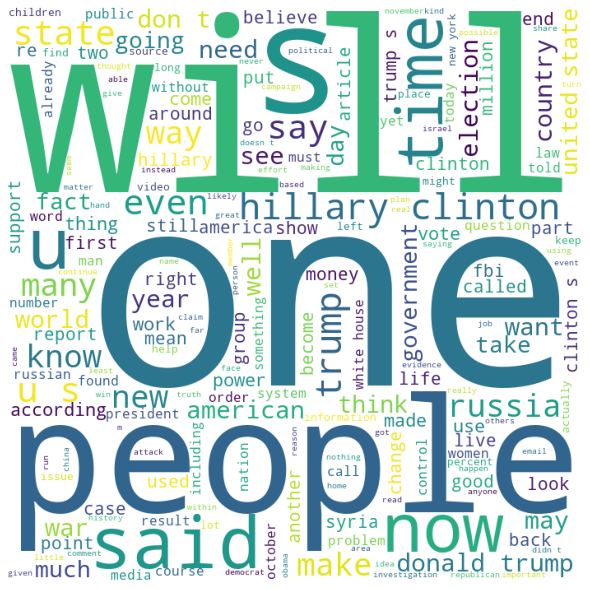

In [22]:
# Specifying the  specifications of the visual box
wordcloud= WordCloud(width = 700, height = 700, background_color = 'white',stopwords= stpwords,
                                                         min_font_size=10).generate(real_words)
# plotting  the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

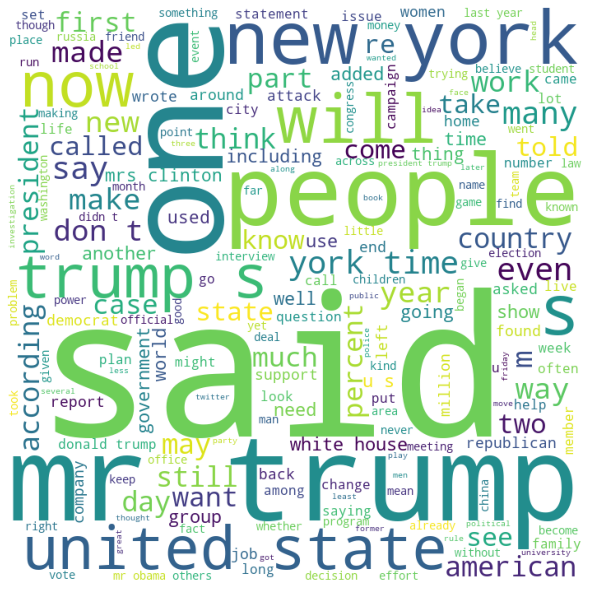

In [23]:
wordcloud= WordCloud(width = 700, height = 700, background_color = 'white',stopwords= stpwords,
                                                         min_font_size=10).generate(fake_words)
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and Preprocessing

# 1) Regex

In [25]:
# It is used to remove the punctuations from the string
str = "!</> Hey$$ </>^bu!!!d%%d&&%$y h@@@ow^^^&&!& </>* ar@e# you&&\? @@@##%^^&@# %%$"

# Regex works on context free grammer
# If any substring in the string does not hold words or space simply replace it with empty string
str = re.sub(r'[^\w\s]','',str)

In [26]:
print(str)

 Hey buddy how  are you  


# 2) Tokenization

In [27]:
# Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/varuna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
nltk.word_tokenize("hey buddy how are you")

['hey', 'buddy', 'how', 'are', 'you']

# 3) StopWords

In [29]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)
# Below are the some predefined stopwords form english language

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# first we are tokenizing the given sentance and after that we are filtering out the stopwords from those tokens
sent = "Globally, new COVID-19 cases rose for the eighth consecutive week, with over 5.2 million new cases reported in the last week. The number of new deaths increased for the fifth consecutive week, increasing by 8% compared to last week, with over 83 000 new deaths reported. While all regions except the European Region reported an increase in incident cases in the last week, the largest increase continues to be reported by the South-East Asia Region, largely driven by India, followed by the Western Pacific Region."
words = nltk.word_tokenize(sent)
words = [w for w in words if w not in stopwords]

# And why are we removing the stopwords form the tokens?
# When we are dealing with a huge data like GBs and TBs then to save a lot of memory we filterout these stopwords
# So that we can do faster modelling and get results faster

In [31]:
words

['Globally',
 ',',
 'new',
 'COVID-19',
 'cases',
 'rose',
 'eighth',
 'consecutive',
 'week',
 ',',
 '5.2',
 'million',
 'new',
 'cases',
 'reported',
 'last',
 'week',
 '.',
 'The',
 'number',
 'new',
 'deaths',
 'increased',
 'fifth',
 'consecutive',
 'week',
 ',',
 'increasing',
 '8',
 '%',
 'compared',
 'last',
 'week',
 ',',
 '83',
 '000',
 'new',
 'deaths',
 'reported',
 '.',
 'While',
 'regions',
 'except',
 'European',
 'Region',
 'reported',
 'increase',
 'incident',
 'cases',
 'last',
 'week',
 ',',
 'largest',
 'increase',
 'continues',
 'reported',
 'South-East',
 'Asia',
 'Region',
 ',',
 'largely',
 'driven',
 'India',
 ',',
 'followed',
 'Western',
 'Pacific',
 'Region',
 '.']

# 4) Lemmatization

In [32]:
# Now what is lemmatization and why do we do it?
# Lemmatization is used to bring the words to their root level and it is done so that there may not arise any
# anbiguity in the future and we are doing lemmatization but not stemming because lemmatization is superior to
# stemming

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

str = "kites babies dogs flying smiling driving  died tried feet"

# Tokenizing the sentance
str = nltk.word_tokenize(str)

# Lemmatizing each word

for i in str:
    print(lemmatizer.lemmatize(i))


kite
baby
dog
flying
smiling
driving
died
tried
foot


# Now above concepts are applying to the Project

In [33]:
for index,row in train.iterrows():
    filtered_sentence = ""
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stopwords]  #stopwords removal
    
    # Here we are forming the cleaned and lemmatized sentence
    for i in words:
        new_word = lemmatizer.lemmatize(i)
        filtered_sentence = filtered_sentence + " "+ new_word
        
    # Now storing the filtered sentence back to its original position in the train dataset
    train.loc[index,'total'] = filtered_sentence
        

In [34]:
# Now finally our train dataset will contain only two required columns
train = train[['total','label']]

In [35]:
train.head()

,total,label
0,House Dem Aide We Didnt Even See Comeys Lette...,1
1,FLYNN Hillary Clinton Big Woman Campus Breitb...,0
2,Why Truth Might Get You Fired Consortiumnewsc...,1
3,15 Civilians Killed In Single US Airstrike Ha...,1
4,Iranian woman jailed fictional unpublished st...,1


# Now applying some NLP techniques

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer # for importing bag_of_words model
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
X_train = train['total']
Y_train = train['label']

# Bag-of-Words / CountVectorizer

In [38]:
corpus = {
    'This is the first document this',
    'This document is the second document.',
    'And this is one  a third one .',
    'Is this the first document?',
}

vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus)
# what is fit_transform here?
# we are doing so on the vector X because whenever we come across some new sentence then our previous saved
# vector can accomodate that change that's why we doing fit and transform
# print(vectorizer.vocabulary)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [39]:
print(X.toarray())

[[0 2 0 1 0 1 1 0 1]
 [0 1 1 1 0 0 1 0 1]
 [0 1 1 1 0 0 1 0 2]
 [1 0 0 1 2 0 0 1 1]]


# TF-iDF Vectorizer 

The purpose of TF-iDF is to hightlight the words which are frequent in the document but across the document

In [40]:
def data_vectorization(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features               
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [41]:
tfidf_features = data_vectorization(['hey buddy how are you doing','I am doing good thanks man'],30)

In [42]:
tfidf_features

array([[0.47107781, 0.47107781, 0.33517574, 0.        , 0.        ,
        0.        , 0.47107781, 0.47107781, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27894255, 0.39204401, 0.39204401,
        0.39204401, 0.        , 0.        , 0.39204401, 0.39204401,
        0.39204401]])

# Now applying TF-iDF to our porject

In [43]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [44]:
tf_idf_matrix.toarray().shape
# as we can see that our matrix shape is (20800, 220387)
# that means is we have 20800 samples and each sample have features 220387

# our text data is converted into numbers using count vectorizer and TF-iDF to train the ML model

MemoryError: Unable to allocate 34.2 GiB for an array with shape (20800, 220387) and data type float64

# Modelling

In [45]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

# split the dataset into samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [46]:
print(X_train.shape,X_test.shape)
# we are taking 15600 samples for training the model and rest 5200 out 220387 for the testing our model purpose

(15600, 220387) (5200, 220387)


Now our data is ready for training the model , since the problem that we are having is binary classification
problem that's why i am going to use Logistic Regression here

In [47]:
from sklearn.linear_model import LogisticRegression #  importing Logistic Regression library

# Logistic Regression

In [48]:
logreg = LogisticRegression(C=1e5)
# now we are feeding the model with  features and  labels 
logreg.fit(X_train, y_train)
# now here we are predicting the our model using  test samples which we have seperated earlier
pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)  # Plotting the confusion Matrix
print(cm) # Priting confusion Matrix

Accuracy of Logistic Regression on training set: 1.00
Accuracy of Logistic Regression on test set: 0.98
[[2493   71]
 [  44 2592]]


# Testing with Multinomial Naive bayes classifier

In [49]:
#    Confusion Matrix
#    TN(2493)     FP(71)
#    FN(44)       TP(2592)

# Furture Testifying our Model with Mutlinomial Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]])

# Pipeline

In [50]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [51]:
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
import sklearn.externals
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Here we are defining the pipeline through which our data will pass
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [53]:
# Fitting the training data to the pipeline
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [54]:
result= pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result)

[0]


In [55]:
# Saving the Pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [56]:
filename = './pipeline.sav'

# Prediction

In [57]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result) 

[0]


Here we have made a prediction just to check our model and here we are finished with our this project